In [1]:
import requests
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Story - 2 : Can the FED Control Inflation and Maintain Full Employment
###The Federal Reserve's mandate from Congress is to control inflation and to maintain low unemployment. These seem to be contradictory objectives. For this story you will need to source the following data for the last 25 years;

#### *   The Consumer Price Index (CPI) (Bureau of Labor Statistics)
#### *   The FED Funds Rate (FRED) (Federal Reserve Board)
#### *   Unemployment Rate  (Bureau of Labor Statistics)

#### Your Data Visualizations should be designed to answer the question "Has the FED been able to fulfill the mandate given to it by Congress?"

In [2]:
# Import or assign API key
ak = "64ff04ec58d44dd1ab4427731c684fc2"

# Fetch Unemployment data using BLS Public Data API

In [3]:
headers = {'Content-type': 'application/json'}

unemploy = pd.DataFrame()

# Fetch the 1st 20years of data
unemploy01 = json.dumps({"seriesid": ['LNS14000000'], "startyear": "1999", "endyear": "2019","registrationkey":ak})
p1 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=unemploy01, headers=headers)
json_unemploy01 = json.loads(p1.text)

# Fetch the last 5years of data
unemploy02 = json.dumps({"seriesid": ['LNS14000000'], "startyear": "2020", "endyear": "2024","registrationkey":ak})
p2 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=unemploy02, headers=headers)
json_unemploy02 = json.loads(p2.text)

unemploy_list = [json_unemploy01, json_unemploy02]

for json_data in unemploy_list:
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
        rows = []
        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']
            footnotes = ""
            for footnote in item['footnotes']:
                if footnote:
                    footnotes = footnotes + footnote['text'] + ','
            if 'M01' <= period <= 'M12':
                rows.append([seriesId, year, period, value, footnotes[0:-1]])
        unemploy_part = pd.DataFrame(rows, columns=["series id", "year", "period", "value", "footnotes"])
        unemploy = pd.concat([unemploy, unemploy_part]).drop(columns=["series id", "footnotes"])

# Unemployment Data Preparation

In [4]:
unemploy['period'] = unemploy['period'].map({'M01':'01', 'M02':'02', 'M03':'03', 'M04':'04', 'M05':'05', 'M06':'06', 'M07':'07', 'M08':'08', 'M09':'09',
       'M10':'10', 'M11':'11', 'M12':'12'})

In [5]:
unemploy['date'] = pd.to_datetime(unemploy['year'].astype(str) + unemploy['period'] + '01', format='%Y%m%d')
unemploy['UNEMPLOYMENT RATE'] = unemploy['value'].astype(float)
unemploy = unemploy.drop(columns=["period","value","year"],axis=1)
unemploy = unemploy.drop_duplicates(subset=['date'], keep="last").reset_index(drop=True)

In [6]:
unemploy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               289 non-null    datetime64[ns]
 1   UNEMPLOYMENT RATE  289 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


In [7]:
unemploy.head()

,date,UNEMPLOYMENT RATE
0,2018-12-01,3.9
1,2018-11-01,3.8
2,2018-10-01,3.8
3,2018-09-01,3.7
4,2018-08-01,3.8


In [8]:
unemploy.shape

(289, 2)

# Fetch CPI data BLS Public Data API

In [9]:

headers = {'Content-type': 'application/json'}

cpi = pd.DataFrame()

# Fetch the 1st 20years of data
cpi01 = json.dumps({"seriesid": ['CUUR0000SA0'], "startyear": "1999", "endyear": "2019","registrationkey":ak})
p1 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=cpi01, headers=headers)
json_cpi01 = json.loads(p1.text)

# Fetch the last 5years of data
cpi02 = json.dumps({"seriesid": ['CUUR0000SA0'], "startyear": "2020", "endyear": "2024","registrationkey":ak})
p2 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=cpi02, headers=headers)
json_cpi02 = json.loads(p2.text)

cpi_list = [json_cpi01, json_cpi02]

for json_data in cpi_list:
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
        rows = []
        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']
            footnotes = ""
            for footnote in item['footnotes']:
                if footnote:
                    footnotes = footnotes + footnote['text'] + ','
            if 'M01' <= period <= 'M12':
                rows.append([seriesId, year, period, value, footnotes[0:-1]])
        cpi_part = pd.DataFrame(rows, columns=["series id", "year", "period", "value", "footnotes"])
        cpi = pd.concat([cpi, cpi_part]).drop(columns=["series id", "footnotes"])

# CPI Data Preparation

In [10]:
cpi['period'] = cpi['period'].map({'M01':'01', 'M02':'02', 'M03':'03', 'M04':'04', 'M05':'05', 'M06':'06', 'M07':'07', 'M08':'08', 'M09':'09',
       'M10':'10', 'M11':'11', 'M12':'12'})

In [11]:
cpi['date'] = pd.to_datetime(cpi['year'].astype(str) + cpi['period'] + '01', format='%Y%m%d')
cpi['CPI'] = cpi['value'].astype(float)
cpi = cpi.drop(columns=["period","value","year"],axis=1)
cpi = cpi.drop_duplicates(subset=['date'], keep="last").reset_index(drop=True)

In [12]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    289 non-null    datetime64[ns]
 1   CPI     289 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


In [13]:
cpi.head()

,date,CPI
0,2018-12-01,251.233
1,2018-11-01,252.038
2,2018-10-01,252.885
3,2018-09-01,252.439
4,2018-08-01,252.146


# Fetch  FED Funds Rate (FRED) using FRED Public API

In [14]:
# Import or assign API key
api_key = "58394c9866a5e8ff6f27cbd23af8e6f7"

# Define the FRED API endpoint
base_url = 'https://api.stlouisfed.org/fred/'

'''
Get observation data from the FRED API
'''

# Assign endpoint
obs_endpoint = 'series/observations'

# Assign parameters
series_id = 'FEDFUNDS'
start_date = '1999-01-01'
end_date = '2024-01-31'
#ts_frequency = 'm'
#ts_units = 'pc1'

obs_params = {
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date,
    # 'frequency': ts_frequency
    # 'units': ts_units
}

# Make request to FRED API
response = requests.get(base_url + obs_endpoint, params=obs_params)

# Format data
if response.status_code == 200:
    res_data = response.json()
    obs_data = pd.DataFrame(res_data['observations'])
    obs_data['date'] = pd.to_datetime(obs_data['date'])
    #obs_data.set_index('date', inplace=True)
    obs_data['FUND RATE'] = obs_data['value'].astype(float)
    obs_data = obs_data.drop(columns=["realtime_start", "realtime_end","value"])

else:
    print('Failed to retrieve data. Status code:', response.status_code)

In [15]:
obs_data = obs_data.drop_duplicates(subset=['date'], keep="last").reset_index(drop=True)
obs_data.head()

,date,FUND RATE
0,1999-01-01,4.63
1,1999-02-01,4.76
2,1999-03-01,4.81
3,1999-04-01,4.74
4,1999-05-01,4.74


In [16]:
obs_data.shape

(301, 2)

# Merge all dataset on date

In [17]:
Econ_ind = pd.merge(pd.merge(cpi,unemploy,on='date'),obs_data,on='date')
Econ_ind.reset_index(drop=True, inplace=True)
Econ_ind.sort_index(inplace=True)
Econ_ind.sort_values('date',ascending = False,inplace=True)
Econ_ind.head()

,date,CPI,UNEMPLOYMENT RATE,FUND RATE
240,2024-01-01,308.417,3.7,5.33
241,2023-12-01,306.746,3.7,5.33
242,2023-11-01,307.051,3.7,5.33
243,2023-10-01,307.671,3.8,5.33
244,2023-09-01,307.789,3.8,5.33


In [18]:
Econ_ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 240 to 239
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               289 non-null    datetime64[ns]
 1   CPI                289 non-null    float64       
 2   UNEMPLOYMENT RATE  289 non-null    float64       
 3   FUND RATE          289 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.3 KB


In [19]:

#Export Dataset to google drive
'''
path = '/content/drive/MyDrive/DATA 608/Assignment 2/Econ_ind.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  Econ_ind.to_csv(f)
  '''

"\npath = '/content/drive/MyDrive/DATA 608/Assignment 2/Econ_ind.csv'\nwith open(path, 'w', encoding = 'utf-8-sig') as f:\n  Econ_ind.to_csv(f)\n  "

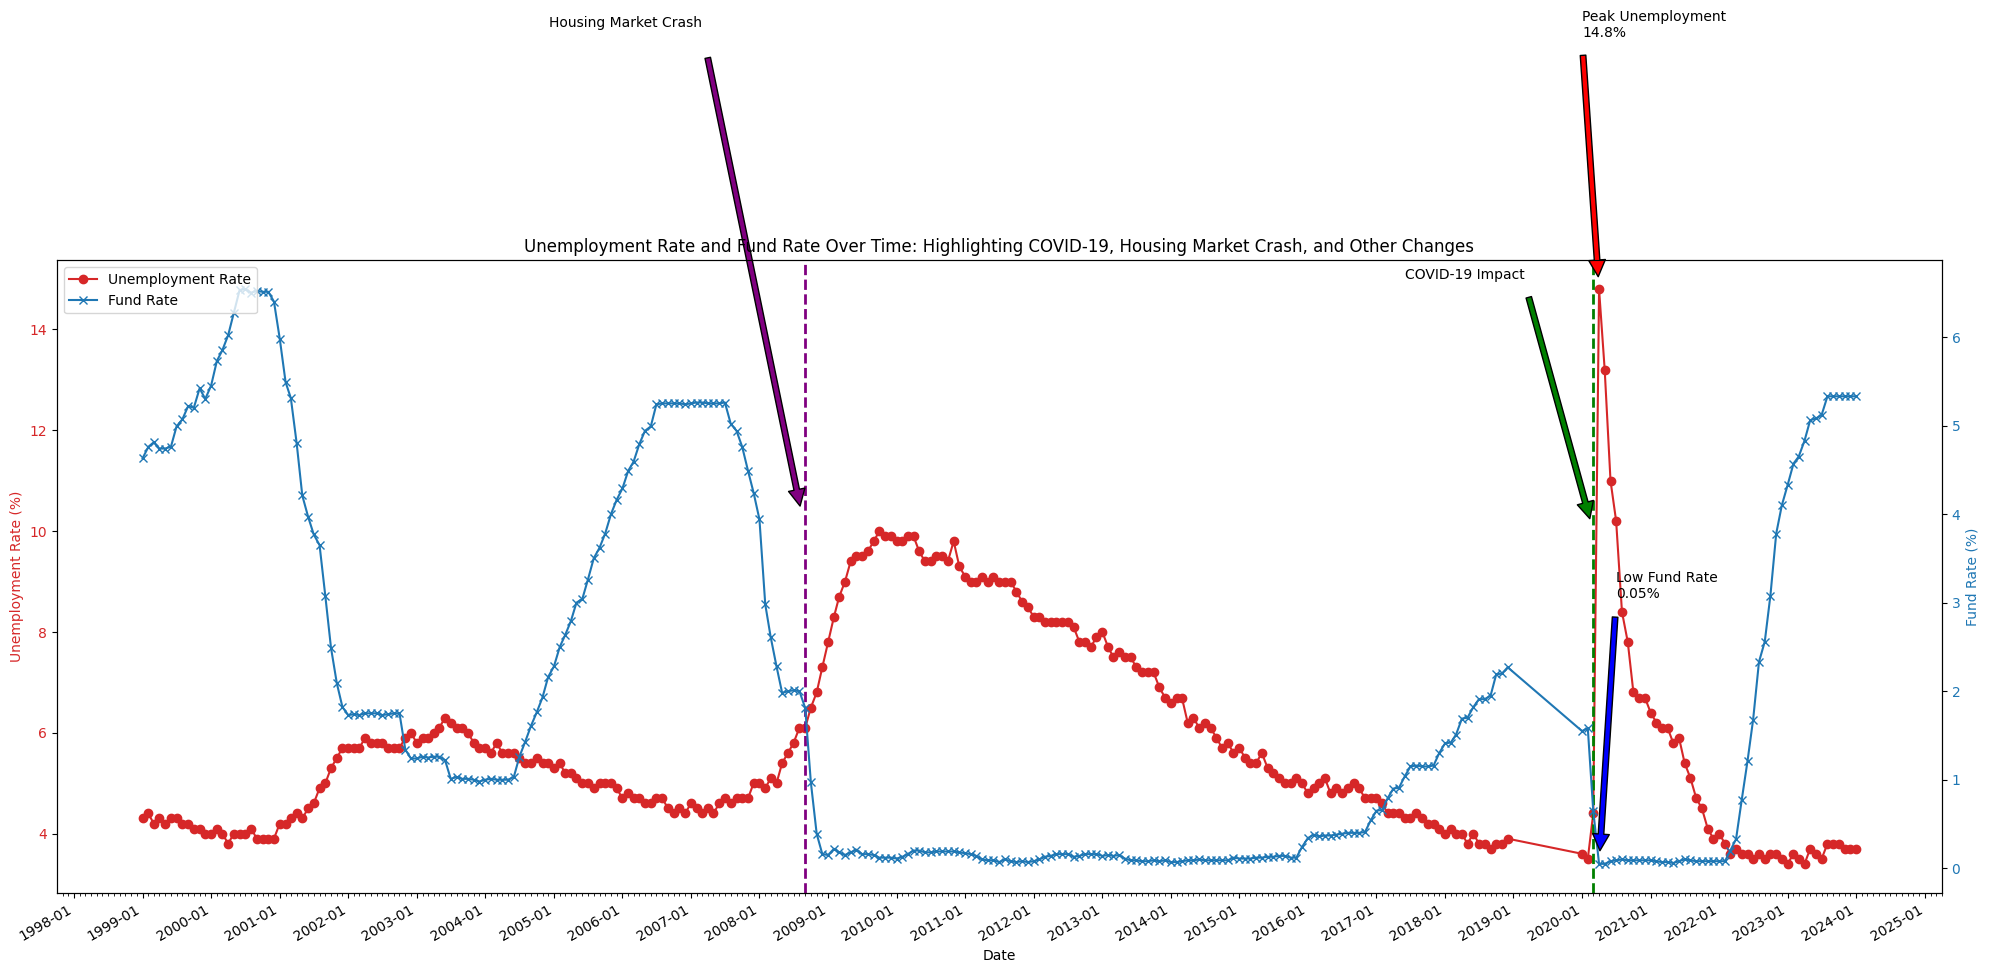

In [20]:
# Enhanced visualization with a focus on the COVID-19 impact, the housing market crash (around 2007-2008), and other significant rises and declines in both the Fund Rate and Unemployment Rate.

fig, ax1 = plt.subplots(figsize=(20, 10))

# Plotting Unemployment Rate
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate (%)', color=color)
unemployment_line, = ax1.plot(Econ_ind['date'], Econ_ind['UNEMPLOYMENT RATE'], color=color, marker='o', label='Unemployment Rate')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Fund Rate
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Fund Rate (%)', color=color)
fund_rate_line, = ax2.plot(Econ_ind['date'], Econ_ind['FUND RATE'], color=color, marker='x', label='Fund Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Annotations for COVID-19 impact
covid_effect_date = pd.to_datetime('2020-03-01')
ax1.axvline(x=covid_effect_date, color='green', linestyle='--', lw=2, label='COVID-19 Impact')
ax1.annotate('COVID-19 Impact', xy=(covid_effect_date, 10), xytext=(covid_effect_date - pd.DateOffset(months=12), 15),
             arrowprops=dict(facecolor='green', shrink=0.05), ha='right')

# Annotations for the Housing Market Crash impact
housing_crash_date = pd.to_datetime('2008-09-01')
ax1.axvline(x=housing_crash_date, color='purple', linestyle='--', lw=2, label='Housing Market Crash')
ax1.annotate('Housing Market Crash', xy=(housing_crash_date, 10), xytext=(housing_crash_date - pd.DateOffset(months=18), 20),
             arrowprops=dict(facecolor='purple', shrink=0.05), ha='right')

# Highlighting other significant rises and declines
# Peak Unemployment during COVID-19
peak_unemployment_covid_date = pd.to_datetime('2020-04-01')
peak_unemployment_covid_value = Econ_ind[Econ_ind['date'] == peak_unemployment_covid_date]['UNEMPLOYMENT RATE'].values[0]
ax1.annotate(f'Peak Unemployment\n{peak_unemployment_covid_value}%',
             xy=(peak_unemployment_covid_date, peak_unemployment_covid_value),
             xytext=(peak_unemployment_covid_date - pd.DateOffset(months=3), peak_unemployment_covid_value + 5),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Decline in Fund Rate during COVID-19
low_fund_rate_covid_date = pd.to_datetime('2020-04-01')
low_fund_rate_covid_value = Econ_ind[Econ_ind['date'] == low_fund_rate_covid_date]['FUND RATE'].values[0]
ax2.annotate(f'Low Fund Rate\n{low_fund_rate_covid_value}%',
             xy=(low_fund_rate_covid_date, low_fund_rate_covid_value),
             xytext=(low_fund_rate_covid_date + pd.DateOffset(months=3), low_fund_rate_covid_value + 3),
             arrowprops=dict(facecolor='blue', shrink=0.05))

# Improve date axis formatting to show year and months
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels to avoid overlap

plt.title('Unemployment Rate and Fund Rate Over Time: Highlighting COVID-19, Housing Market Crash, and Other Changes')
fig.tight_layout()
plt.legend(handles=[unemployment_line, fund_rate_line], loc='upper left')
plt.show()


##The visualization now includes annotations and graph markers highlighting the impact of COVID-19, the Housing Market Crash (around 2007-2008), and other significant rises and declines in both the Fund Rate and the Unemployment Rate. Key moments, such as the onset of the COVID-19 pandemic in March 2020 and the Housing Market Crash in September 2008, are marked with vertical lines and annotations to indicate their profound effects on the economy. Additional annotations provide context for peaks in unemployment and lows in the fund rate during these periods, with the date axis formatted to display both year and months for detailed analysis. This comprehensive visualization helps to illustrate the Federal Reserve's responses to these crises and their effects on unemployment and interest rates over time

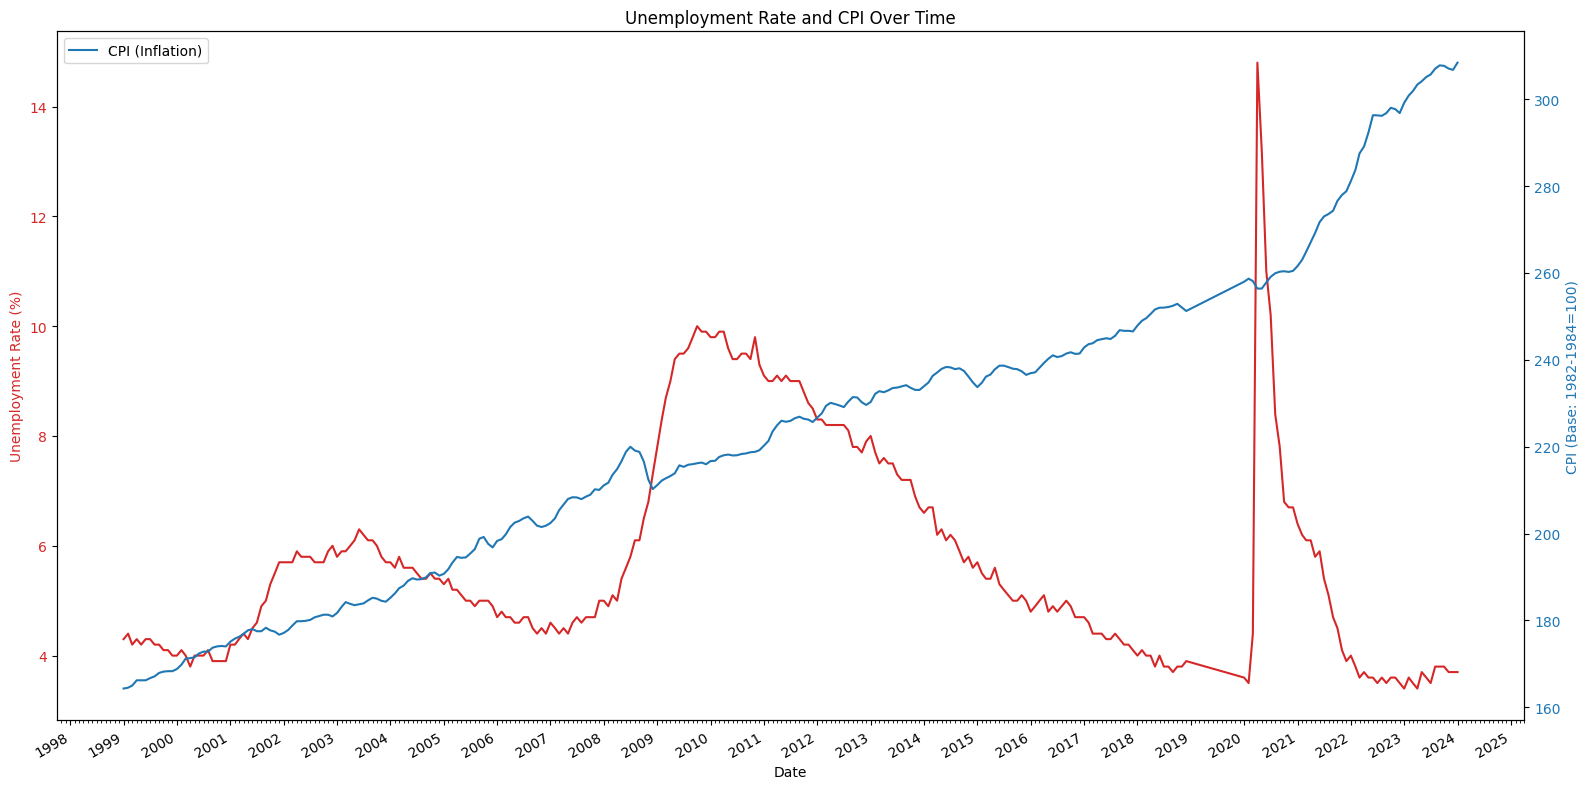

In [21]:
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot Unemployment Rate
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate (%)', color=color)
ax1.plot(Econ_ind['date'], Econ_ind['UNEMPLOYMENT RATE'], color=color, label='Unemployment Rate')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the CPI
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CPI (Base: 1982-1984=100)', color=color)
ax2.plot(Econ_ind['date'], Econ_ind['CPI'], color=color, label='CPI (Inflation)')
ax2.tick_params(axis='y', labelcolor=color)

# Improve date axis formatting to show year and month
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels to avoid overlap

plt.title('Unemployment Rate and CPI Over Time')
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()



The visualization presents the Unemployment Rate and the Consumer Price Index (CPI) over time, offering insights into the Federal Reserve's effectiveness in fulfilling its dual mandate from Congress to control inflation and maintain low unemployment.

##Unemployment Rate (Red Line): The trend in unemployment rate fluctuations over time reflects periods of economic downturn and recovery, indicating the Fed's responses to economic conditions with the aim of maintaining low unemployment.

##CPI (Blue Line): The CPI trend serves as a proxy for inflation, showing how price levels have changed over the same period. A steady or controlled increase in CPI is indicative of managed inflation, while sharp increases might suggest periods of less effective inflation control.


##By observing the trends in both indicators, we can evaluate the Fed's performance in achieving its mandate:

##During periods where both the unemployment rate is low and CPI growth is steady, it suggests effective fulfillment of the Fed's mandate. Conversely, periods of high unemployment or rapid CPI increases might indicate challenges in meeting one or both aspects of the mandate.
##Based on the plot, while there are periods of success in managing unemployment and inflation, challenges remain, highlighted by fluctuations in both metrics. This underscores the complexities of macroeconomic management and the impact of external factors on economic conditions.